<small>Mentoría de la Diplomatura en Ciencia de Datos y sus Aplicaciones - FaMAF UNC 2022.</small>
# Detección de anomalías en despachos de combustible

## Práctico de Análisis y Visualización de Datos

**Mentora:** Daniela Bosch

**Integrantes:**

### Introducción

En este trabajo buscamos obtener una primera aproximación a los resultados observando la distribución de las variables e identificando los outliers.

Los datos con la descripción de cada una de sus columnas puede encontrarse en el siguiente link: https://www.kaggle.com/datasets/danielabosch/fuel-transactions-from-gas-pump

#### Objetivos del práctico

- Conocer el dataset y familiarizarse con series temporales.
- Observar comportamientos similares entre series.
- Analizar visualmente outliers observando las distribuciones.

### Lectura del dataset

Importamos las librerías necesarias y leemos el dataset.


In [1]:
import pandas

In [2]:
df = pandas.read_csv(
    "transacciones_surtidor.csv",
    parse_dates=["timestamp", "timestamp_stop"],
    dtype={"departamento": str}
)
df.head()

,unique_id_transa,id_transaccion,id_vehiculo,id_usuario,id_equipo,veh_site_id,pump_site_id,tank_site_id,user_site_id,producto,...,temp_final,volumen_comp_15_inicial,volumen_comp_15_final,cantidad_comp_15,codigo_producto,geo_latitud,geo_longitud,id_empresa,id_industria,industria
0,377220101009999,9999,90952,12708,377,000001,1,1,0000,0.0,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,238,1.0,Transportation
1,504220101006768,6768,101866,6683,504,000001,1,1,0000,0.0,...,NaN,NaN,NaN,158.416,Product 1,NaN,NaN,25,5.0,Distributor
2,534220101007334,7334,123844,34280,534,009593,1,1,3532,0.0,...,30.2,17836.50,17728.5,107.850,0000,NaN,NaN,273,1.0,Transportation
3,878220101002206,2206,141769,46520,878,000103,2,1,0000,0.0,...,NaN,6921.42,NaN,80.002,GOM G3,NaN,NaN,1142,2.0,Mining
4,898220101005224,5224,129356,29688,898,999014,2,1,0001,0.0,...,NaN,NaN,NaN,734.900,Diesel 500,NaN,NaN,1083,1.0,Transportation


Se puede observar que las series se encuentran mezcladas en el mismo dataset. Para realizar algunos análisis más interesantes debemos agruparlas o usar pivotes.

In [3]:
df.groupby("id_bomba")["cantidad"].describe()

,count,mean,std,min,25%,50%,75%,max
id_bomba,,,,,,,,
0,18.0,0.043667,0.102923,0.000,0.0000,0.0005,0.00175,0.320
62,1184.0,125.802258,91.177540,0.000,100.0000,100.0000,172.66025,633.995
69,718.0,59.569656,64.581628,0.000,22.1960,43.9305,71.18325,631.005
70,2622.0,73.834542,69.283943,0.000,33.0360,57.0420,87.07850,560.029
87,7.0,923.179714,0.023164,923.156,923.1635,923.1710,923.19100,923.222
...,...,...,...,...,...,...,...,...
103093,7.0,13.593286,12.939399,0.000,0.5460,20.1490,21.28400,31.344
103094,1.0,0.000000,NaN,0.000,0.0000,0.0000,0.00000,0.000
103095,21.0,18.542952,22.936837,0.000,0.0370,20.1510,20.19800,104.295


### Consignas

Se proponen dos actividades de base y una actividad opcional referida al análisis de series temporales. Realizar una breve conclusión sobre los resultados obtenidos.

#### 1. Análisis descriptivo

- Seleccionar las columnas de interés a analizar.
- Realizar un análisis descriptivo sobre el conjunto completo y sobre algunos agrupadores (industria, empresa, etc). **¿Qué diferencias se pueden ver entre los estadísticos de las agrupaciones?** (Ej. la industria minería tiene un consumo medio por transacción mayor a la industria de transporte).
- Seleccionar una o dos industrias. Realizar un análisis descriptivo ahora teniendo en cuenta periodos de tiempo (día de la semana, semana, día del mes, etc). **¿Se observan comportamientos distintos según el periodo de tiempo?**



> _Se debe convertir el timestamp a índice para ciertos análisis. Además deben estar ordenados._



In [3]:
df.set_index("timestamp", inplace=True)
df = df.sort_index()

In [13]:
# Agrupación por periodo
df.groupby(pandas.Grouper(freq='1D'))["cantidad"].mean().head()

timestamp
2022-01-01    141.718385
2022-01-02    343.116945
2022-01-03    204.545689
2022-01-04    228.681796
2022-01-05    237.879609
Freq: D, Name: cantidad, dtype: float64

#### 2. Visualización de outliers

- Seleccionar las variables de interés.
- Graficar las distribuciones de estas variables para todo el conjunto y destacar sus outliers. Utilizar boxplots, boxenplots o visualizaciones que crean convenientes.
- Graficar las distribuciones ahora agrupando por cualidades en común entre las series (ej. por industria). **¿Ciertas transacciones podrían considerarse anómalas en una [industria] mientras que en otra no?**
- Comparar outliers visualizados entre ambos gráficos **¿Qué anomalías se detectaron en una visualización mientras que en la otra no?**

#### (Opcional) 3. Descomposición de series temporales

El análisis de los componentes de una serie temporal nos puede ayudar más adelante para detectar anomalías relacionadas a su comportamiento estacionario. Una de las librerías recomentadas para la descomposición es `statsmodels`. En este ejercicio se requiere:

- Elegir dos estaciones de un sector de la industria y dos estaciones de otra industria, y graficar sus descomposiciones (estacionalidad, tendencia, residuo). Elegir correctamente el periodo para cada una.
- ¿Las series son estacionarias? Analizar gráficamente.
- Observar las estacionalidades y las tendencias de las series. **¿Se pueden ver comportamientos similares entre estaciones de la misma industria? ¿Y entre industrias?**
- Observar los residuos de las series **¿Se pueden detectar a simple vista algunos outliers?** Comentar.





> _Verificar que la versión de statsmodels sea la última versión estable (0.13.2) ya que cambian varios métodos. Google Colab utiliza por defecto la versión 0.10.2._



In [ ]:
# !pip install statsmodels==0.13.2
# import statsmodels
# statsmodels.__version__

Se deja a modo de ejemplo, la descomposición de la serie de una estación.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
# Seleccionamos una estación
station = 504

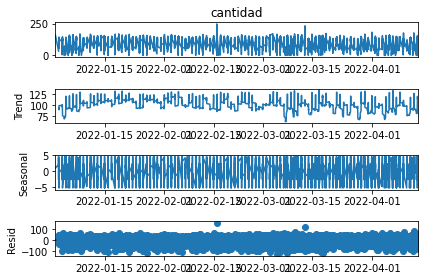

In [ ]:
# Convertir el timestamp a índice en el caso de no haberse realizado 
# anteriormente
# ts_station_504 = df.query("id_equipo == @station").set_index("timestamp")
ts_station_504 = df.query("id_equipo == @station")
res = seasonal_decompose(ts_station_504["cantidad"], period=24, model="aditive")

fig = res.plot()

### Entregable

Se propone la elaboración de un informe que deberá entregarse en formato de notebook tipo Jupyter o Google Colaboratory, con los resultados guardados, gráficos, notas y conclusiones. El mismo deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.

**Fecha de entrega: 20/05/2022**

### Enlaces útiles
- https://www.kaggle.com/code/jagangupta/time-series-basics-exploring-traditional-ts/notebook
- https://www.kaggle.com/code/bextuychiev/every-pandas-function-to-manipulate-time-series/notebook
- https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
- https://neptune.ai/blog/anomaly-detection-in-time-series